# **SCTP CAPSTONE 4: FRAUD DETECTION**

## **Introduction to Dataset**

<img src="https://i.gyazo.com/a4230351d3aa8025fe43c30b025553b4.png" alt="Image from Gyazo" width="1285"/></a>

## **Assumptions**
##### 1) TRANSFER and CASHOUT transaction types will be mainly used throughout </p>
##### 2) Any amount above 200,000 is automatically flagged as fraud but not necessarily a fraudalent transaction.
* Therefore, amounts below 200,000 will be used instead

##### 3) Account Balances to be removed due to their redundancy (amount column is in dataset)

##### 4) Fraud only happens when there is a **transfer** followed by a **cash out** in that order (as stated in dataset description on Kaggle)


## Import libraries, load & read data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

import seaborn as sns
from sklearn import datasets, linear_model

import random
import string

!pip install texttable
from texttable import Texttable

from IPython.display import Image

SEED = 42
np.random.seed(SEED)

In [2]:
#For Google Drive File (CSV file needs to be in individual Google Drive)

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SCTP Capstone 4/dataset.csv')

Mounted at /content/drive


In [3]:
#For Local File (CSV file needs to be in computer)

#data = pd.read_csv('dataset.csv')

In [4]:
data.info(show_counts =  True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Data Pre-Processing & EDA

Steps taken to process data:
* head and tail
* info and describe
* drop columns
* astype
* value_counts

In [6]:
data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


In [7]:
data.tail(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


* Remove the balances as the 'amount' column shows the difference between the balances
* Remove 'isFlaggedFraud' column as the 'isFraud' column shows if the transaction is fraudulent

In [8]:
data_clean = data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'], axis = 1)

* Filter amount to less $200,000

In [9]:
data_clean = data_clean[data_clean['amount'] < 200000]

In [10]:
data_clean.describe()

,step,amount,isFraud
count,4.689050e+06,4.689050e+06,4.689050e+06
mean,2.441890e+02,5.694368e+04,5.847666e-04
std,1.421601e+02,5.880402e+04,2.417488e-02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.570000e+02,8.910760e+03,0.000000e+00
50%,2.490000e+02,2.866615e+04,0.000000e+00
75%,3.350000e+02,9.935762e+04,0.000000e+00
max,7.420000e+02,1.999999e+05,1.000000e+00


In [11]:
data_clean.info(show_counts =  True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689050 entries, 0 to 6362611
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   step      4689050 non-null  int64  
 1   type      4689050 non-null  object 
 2   amount    4689050 non-null  float64
 3   nameOrig  4689050 non-null  object 
 4   nameDest  4689050 non-null  object 
 5   isFraud   4689050 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 250.4+ MB


* Changed data types of columns to category as the information are generally categorical

In [12]:
cols = ['type', 'nameOrig', 'nameDest', 'isFraud']
data_clean[cols] = data_clean[cols].astype('category')

data_clean.info(show_counts =  True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689050 entries, 0 to 6362611
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   step      4689050 non-null  int64   
 1   type      4689050 non-null  category
 2   amount    4689050 non-null  float64 
 3   nameOrig  4689050 non-null  category
 4   nameDest  4689050 non-null  category
 5   isFraud   4689050 non-null  category
dtypes: category(4), float64(1), int64(1)
memory usage: 401.7 MB


0    4686308
1       2742
Name: isFraud, dtype: int64

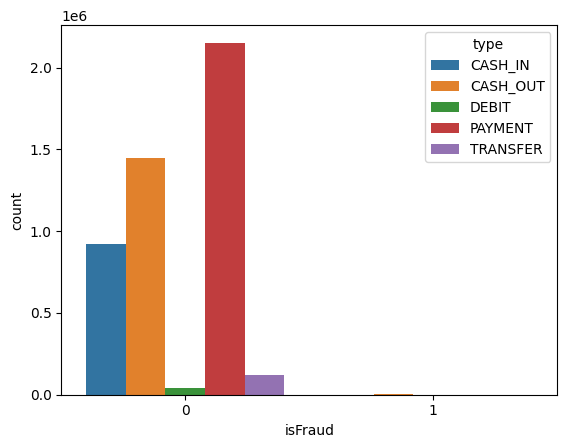

In [13]:
sns.countplot(data = data_clean, x = 'isFraud', hue = 'type')

data_clean['isFraud'].value_counts()

## Observing Fraud Behaviour


*   To determine what fraud behaviour is and how it could be detected



* Filter only FRAUD cases

In [14]:
data_fraud = data_clean[data_clean['isFraud'] == 1]

data_fraud.describe()

,step,amount
count,2742.000000,2742.000000
mean,359.764041,81281.120963
std,221.517940,57118.054758
min,1.000000,0.000000
25%,169.250000,30548.460000
50%,352.000000,73051.020000
75%,557.000000,127120.880000
max,742.000000,199940.020000


In [15]:
data_fraud.info(show_counts =  True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 2 to 6362611
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   step      2742 non-null   int64   
 1   type      2742 non-null   category
 2   amount    2742 non-null   float64 
 3   nameOrig  2742 non-null   category
 4   nameDest  2742 non-null   category
 5   isFraud   2742 non-null   category
dtypes: category(4), float64(1), int64(1)
memory usage: 249.7 MB


CASH_OUT    1385
TRANSFER    1357
CASH_IN        0
DEBIT          0
PAYMENT        0
Name: type, dtype: int64

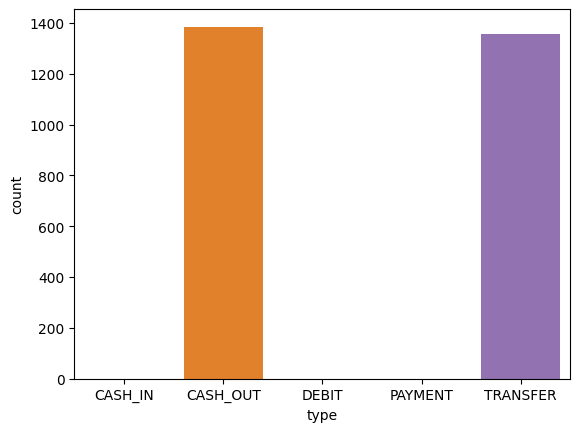

In [16]:
sns.countplot(data = data_fraud, x = 'type')

data_fraud['type'].value_counts()

* Determine number of unique rows

In [17]:
data_fraud.nunique()

step         635
type           2
amount      1371
nameOrig    2742
nameDest    2735
isFraud        1
dtype: int64

* Determine number of duplicates

In [18]:
data_fraud['nameDest'].duplicated().sum()

7

In [19]:
dup = data_fraud['nameDest'].value_counts().to_frame('Count').reset_index()

duplist = dup[dup['Count'] > 1]

duplist

,index,Count
0,C1460854172,2
1,C505532836,2
2,C1650668671,2
3,C1980653895,2
4,C1655359478,2
5,C410033330,2
6,C200064275,2


In [20]:
merchant = data_fraud[data_fraud['nameDest'].str[:1] == 'M']

merchant

,step,type,amount,nameOrig,nameDest,isFraud


#### **! OBSERVATION & INSIGHT**

* Destination account used maximum of 2 times
  * Could be to avoid detection or suspicious activities
* There are no Merchants in Account Destinations, hence, rows containing Merchants can be removed from dataset

* Create 2 separate dataframes to focus on TRANSFER and CASHOUT transactions

In [21]:
transferdf = data_fraud[data_fraud['type'] == 'TRANSFER'].reset_index(drop = True)
cashoutdf = data_fraud[data_fraud['type'] == 'CASH_OUT'].reset_index(drop = True)

print(transferdf)
print(cashoutdf)

      step      type     amount     nameOrig     nameDest isFraud
0        1  TRANSFER     181.00  C1305486145   C553264065       1
1        1  TRANSFER    2806.00  C1420196421   C972765878       1
2        1  TRANSFER   20128.00   C137533655  C1848415041       1
3        1  TRANSFER   35063.63  C1364127192  C1136419747       1
4        1  TRANSFER   25071.46   C669700766  C1384210339       1
...    ...       ...        ...          ...          ...     ...
1352   741  TRANSFER  114149.44  C1157446475  C1367473638       1
1353   741  TRANSFER  144945.34    C31496887  C1251365829       1
1354   741  TRANSFER   48442.88  C1112979339  C2114078084       1
1355   742  TRANSFER   54652.46  C1674778854  C1930074465       1
1356   742  TRANSFER   63416.99   C778071008  C1812552860       1

[1357 rows x 6 columns]
      step      type     amount     nameOrig     nameDest isFraud
0        1  CASH_OUT     181.00   C840083671    C38997010       1
1        1  CASH_OUT    2806.00  C2101527076  C1007

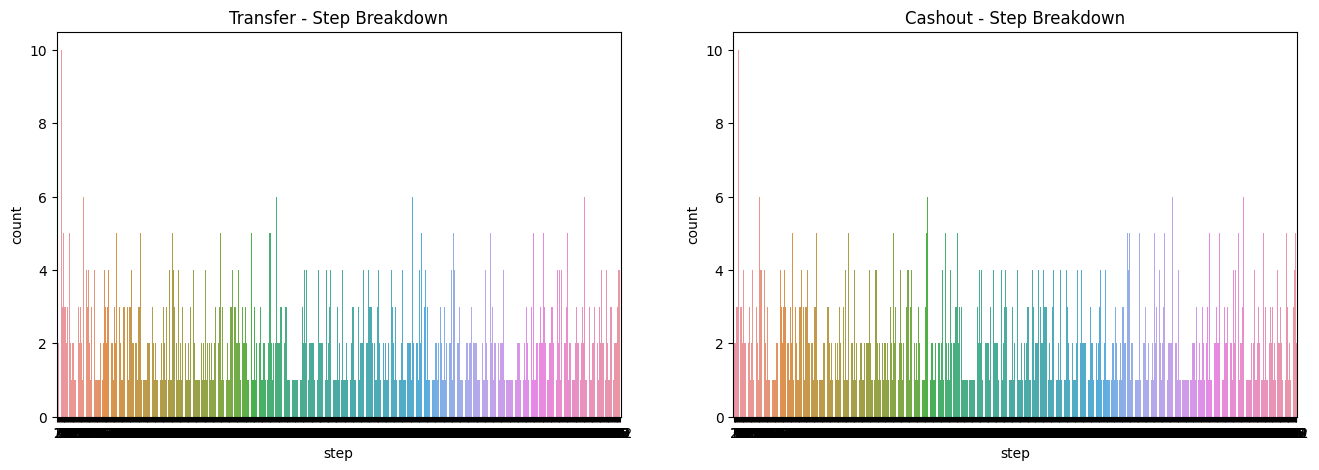

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

_ = sns.countplot(ax=axes[0], data = transferdf, x = 'step')
_ = axes[0].set_title('Transfer - Step Breakdown')

_ = sns.countplot(ax=axes[1], data = cashoutdf, x = 'step')
_ = axes[1].set_title('Cashout - Step Breakdown')

* Compare the 2 transaction types using the origin and destination accounts, duplicated list and amounts

In [23]:
# Compare Transfer & Cash Out Account Destinations

compareTC = transferdf['nameDest'].isin(cashoutdf['nameDest']).to_frame('Bool').reset_index(drop = True)

compareTC['Bool'].value_counts()

False    1356
True        1
Name: Bool, dtype: int64

In [24]:
# Compare Transfer & Duplicate Account Destinations

compareTD = transferdf['nameDest'].isin(duplist['index']).to_frame('Bool').reset_index(drop = True)

compareTD['Bool'].value_counts()

False    1356
True        1
Name: Bool, dtype: int64

In [25]:
# Compare Cash Out & Duplicate Account Destinations

compareCD = cashoutdf['nameDest'].isin(duplist['index']).to_frame('Bool').reset_index(drop = True)

compareCD['Bool'].value_counts()

False    1372
True       13
Name: Bool, dtype: int64

#### **! OBSERVATION & INSIGHT**

* More destination accounts from cashout are found in the duplicates list as compared to transfer.
* In dataset, fraudulent cases happen when fraudsters transfer to another account and then cashing out of the system.
* Therefore, makes sense that cashout has more as fraudsters may cash out more than once in smaller amounts than transferred to avoid detection.

In [26]:
# Check if there's any duplicates between Origin and Destination Accounts to confirm fraudulent behaviour

check = cashoutdf['nameOrig'].isin(transferdf['nameDest']).to_frame('Bool').reset_index(drop = True)

check['Bool'].value_counts()

False    1385
Name: Bool, dtype: int64

#### **! OBSERVATION & INSIGHT**

* Origin accounts have no duplicates in destination accounts.
* Therefore, unable to properly utilise origin accounts to understand fraud behaviour -> should be dropped.
* Not much insights could be explored with the duplicated destination accounts as well -> should be dropped.

In [27]:
# Check if there's any duplicates between the amounts in Origin and Destination Accounts to confirm fraudulent behaviour

amountdf = cashoutdf['amount'].isin(transferdf['amount']).to_frame('Bool').reset_index(drop = True)

amountdf['Bool'].value_counts()

True     1356
False      29
Name: Bool, dtype: int64

#### **! OBSERVATION & INSIGHT**

* Majority of the amounts are found in both origin accounts and destination accounts.
* The amount column is more useful and could be used to explore further.

##### **! One way to detect fraud is when the transaction amounts in both origin and destination accounts are the same.**

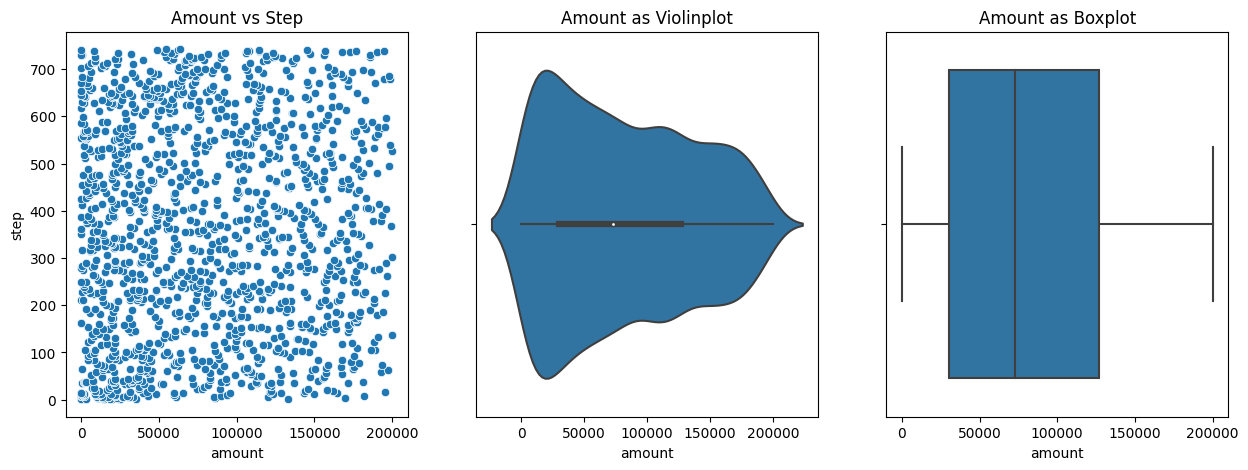

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

_ = sns.scatterplot(ax=axes[0], data = data_fraud, x = 'amount', y = 'step')
_ = axes[0].set_title('Amount vs Step')

_ = sns.violinplot(ax=axes[1], data = data_fraud, x = 'amount')
_ = axes[1].set_title('Amount as Violinplot')

_ = sns.boxplot(ax=axes[2], data = data_fraud, x = 'amount')
_ = axes[2].set_title('Amount as Boxplot')

* To further utilise the 'amount' column, determine transactions with same amounts in origin and destination accounts

In [29]:
for i in range(len(cashoutdf)):
    for x in range(len(transferdf)):
        if transferdf['amount'][x] == cashoutdf['amount'][i]:
            transferdf.loc[x,'step2'] = cashoutdf['step'][i]
            transferdf.loc[x,'type2'] = cashoutdf['type'][i]
            transferdf.loc[x,'amount2'] = cashoutdf['amount'][i]

transferdf

,step,type,amount,nameOrig,nameDest,isFraud,step2,type2,amount2
0,1,TRANSFER,181.00,C1305486145,C553264065,1,1.0,CASH_OUT,181.00
1,1,TRANSFER,2806.00,C1420196421,C972765878,1,1.0,CASH_OUT,2806.00
2,1,TRANSFER,20128.00,C137533655,C1848415041,1,1.0,CASH_OUT,20128.00
3,1,TRANSFER,35063.63,C1364127192,C1136419747,1,1.0,CASH_OUT,35063.63
4,1,TRANSFER,25071.46,C669700766,C1384210339,1,1.0,CASH_OUT,25071.46
...,...,...,...,...,...,...,...,...,...
1352,741,TRANSFER,114149.44,C1157446475,C1367473638,1,741.0,CASH_OUT,114149.44
1353,741,TRANSFER,144945.34,C31496887,C1251365829,1,741.0,CASH_OUT,144945.34
1354,741,TRANSFER,48442.88,C1112979339,C2114078084,1,741.0,CASH_OUT,48442.88
1355,742,TRANSFER,54652.46,C1674778854,C1930074465,1,742.0,CASH_OUT,54652.46


In [30]:
fraud_final = transferdf.drop(['nameOrig', 'nameDest'], axis = 1)

fraud_final

,step,type,amount,isFraud,step2,type2,amount2
0,1,TRANSFER,181.00,1,1.0,CASH_OUT,181.00
1,1,TRANSFER,2806.00,1,1.0,CASH_OUT,2806.00
2,1,TRANSFER,20128.00,1,1.0,CASH_OUT,20128.00
3,1,TRANSFER,35063.63,1,1.0,CASH_OUT,35063.63
4,1,TRANSFER,25071.46,1,1.0,CASH_OUT,25071.46
...,...,...,...,...,...,...,...
1352,741,TRANSFER,114149.44,1,741.0,CASH_OUT,114149.44
1353,741,TRANSFER,144945.34,1,741.0,CASH_OUT,144945.34
1354,741,TRANSFER,48442.88,1,741.0,CASH_OUT,48442.88
1355,742,TRANSFER,54652.46,1,742.0,CASH_OUT,54652.46


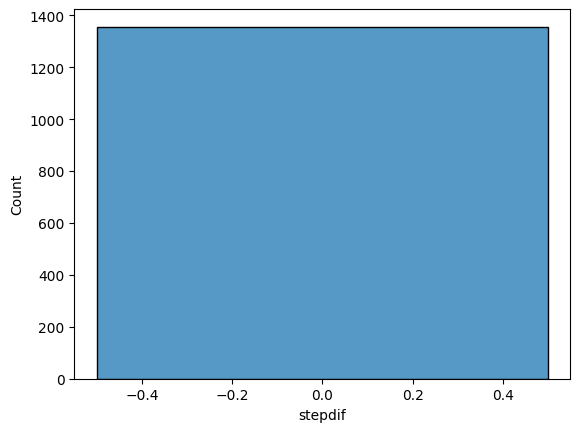

In [31]:
fraud_final['stepdif'] = fraud_final['step2'] - fraud_final['step']

_ = sns.histplot(x = fraud_final['stepdif'])

In [32]:
fraud_final['stepdif'].describe()

count    1356.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: stepdif, dtype: float64

#### **! OBSERVATION & INSIGHT**

* All of the transactions show that TRANSFER and CASHOUT are done **within the hour** </p>

* If fraudsters cash out more than 1 hour of transfer could be due to
 1. amount transferred originally so cashout in smaller amounts
 2. circumstances such as communication via middlemen, spotchecks/raids, etc
 3. prolonged period to minimise or avoid detection



#### **HOW TO DETECT FRAUD**
1.   TRANSFER amount and CASHOUT amount are the same
2.   Time taken to transfer and cashout are done within the hour (short interval)

## Preparing Data for ML Models (includes checking non fraud data)

* Removing Merchants in Destination Accounts from Data Set

In [33]:
data_clean.drop(data_clean[data_clean['nameDest'].str[:1] == 'M'].index, inplace = True)

data_clean[data_clean['nameDest'].str[:1] == 'M']

,step,type,amount,nameOrig,nameDest,isFraud


* Exploring non fraud data

In [34]:
non_fraud = data_clean[data_clean['isFraud'] == 0]

non_fraud.describe()

,step,amount
count,2.534819e+06,2.534819e+06
mean,2.439041e+02,9.416721e+04
std,1.415434e+02,5.690684e+04
min,1.000000e+00,1.000000e-02
25%,1.570000e+02,4.533418e+04
50%,2.490000e+02,9.206577e+04
75%,3.340000e+02,1.417331e+05
max,7.180000e+02,1.999999e+05


In [35]:
non_fraud.info(show_counts =  True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534819 entries, 9 to 6362323
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   step      2534819 non-null  int64   
 1   type      2534819 non-null  category
 2   amount    2534819 non-null  float64 
 3   nameOrig  2534819 non-null  category
 4   nameDest  2534819 non-null  category
 5   isFraud   2534819 non-null  category
dtypes: category(4), float64(1), int64(1)
memory usage: 331.8 MB


CASH_OUT    1447556
CASH_IN      923416
TRANSFER     122442
DEBIT         41405
PAYMENT           0
Name: type, dtype: int64

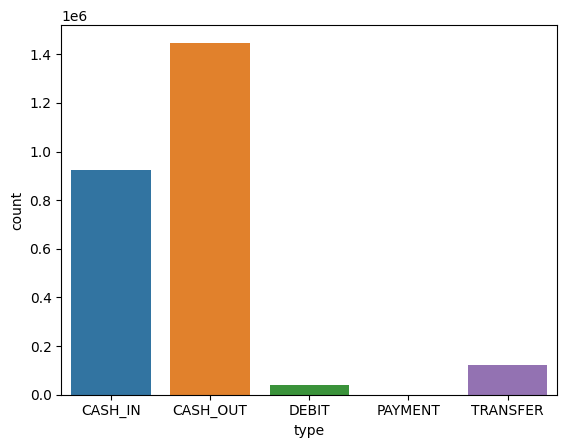

In [36]:
sns.countplot(data = non_fraud, x = 'type')

non_fraud['type'].value_counts()

*   To better prepare dataset, non fraud should include **duplicated amounts** to train and test ML model
*   One of the fraud behaviour is when TRANSFER and CASHOUT amounts are the same

In [37]:
non_fraud['amount'].duplicated().sum()

156586

In [38]:
duplistnon = non_fraud[non_fraud['amount'].duplicated()]

duplistnon.reset_index()

,index,step,type,amount,nameOrig,nameDest,isFraud
0,26144,8,CASH_OUT,129579.09,C1911360350,C1261940766,0
1,26468,8,CASH_OUT,141506.84,C47293631,C1021790512,0
2,31846,8,CASH_OUT,146606.63,C1289055258,C155439298,0
3,32025,8,CASH_OUT,101056.80,C538054341,C943512909,0
4,41748,9,TRANSFER,119162.63,C1742216567,C1396755641,0
...,...,...,...,...,...,...,...
156581,6362195,718,CASH_IN,44562.05,C1112247796,C943461374,0
156582,6362205,718,TRANSFER,31130.12,C2139421890,C58619213,0
156583,6362223,718,TRANSFER,76507.70,C1157171835,C720176528,0
156584,6362236,718,CASH_OUT,115256.41,C2132786251,C548745652,0


In [39]:
duplistnon['type'].value_counts()

CASH_OUT    88913
CASH_IN     56978
TRANSFER     7251
DEBIT        3444
PAYMENT         0
Name: type, dtype: int64

* Create 2 separate dataframes to focus on TRANSFER and CASHOUT transactions

In [40]:
transfernon = duplistnon[duplistnon['type'] == 'TRANSFER'].reset_index(drop = True)
cashoutnon = duplistnon[duplistnon['type'] == 'CASH_OUT'].reset_index(drop = True)

print(transfernon)
print(cashoutnon)

      step      type     amount     nameOrig     nameDest isFraud
0        9  TRANSFER  119162.63  C1742216567  C1396755641       0
1       10  TRANSFER  147911.30   C684681203  C1660926430       0
2       11  TRANSFER  126549.14   C705753853   C767720637       0
3       12  TRANSFER  128467.88   C991371438  C1090594488       0
4       12  TRANSFER  154686.99  C1720248488  C1556080251       0
...    ...       ...        ...          ...          ...     ...
7246   718  TRANSFER   47467.52  C1278842249    C81731427       0
7247   718  TRANSFER  160633.62  C1513268460   C665059174       0
7248   718  TRANSFER   80633.24   C847696702   C855152322       0
7249   718  TRANSFER   31130.12  C2139421890    C58619213       0
7250   718  TRANSFER   76507.70  C1157171835   C720176528       0

[7251 rows x 6 columns]
       step      type     amount     nameOrig     nameDest isFraud
0         8  CASH_OUT  129579.09  C1911360350  C1261940766       0
1         8  CASH_OUT  141506.84    C47293631  C1

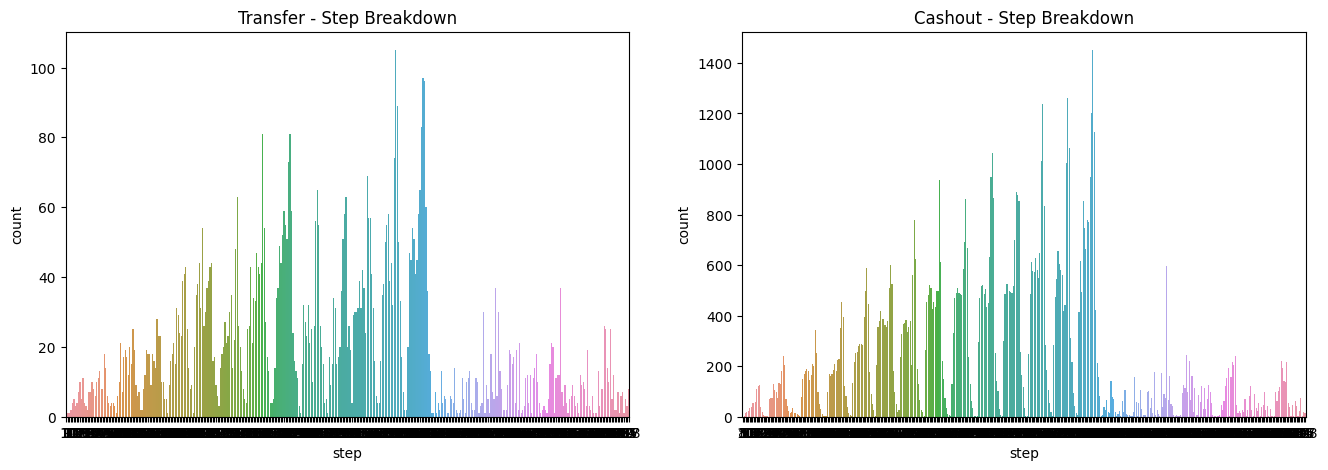

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

_ = sns.countplot(ax=axes[0], data = transfernon, x = 'step')
_ = axes[0].set_title('Transfer - Step Breakdown')

_ = sns.countplot(ax=axes[1], data = cashoutnon, x = 'step')
_ = axes[1].set_title('Cashout - Step Breakdown')

In [42]:
transferindex = transfernon[transfernon['amount'].isin(cashoutnon['amount'])].index
cashoutindex = cashoutnon[cashoutnon['amount'].isin(transfernon['amount'])].index

for i in transferindex:
    for x in cashoutindex:
        if cashoutnon.iloc[x,2] == transfernon.iloc[i,2]:
          cashoutnon.loc[x,'step2'] = transfernon['step'][i]
          cashoutnon.loc[x,'type2'] = transfernon['type'][i]
          cashoutnon.loc[x,'amount2'] = transfernon['amount'][i]
          break

cashoutnon

,step,type,amount,nameOrig,nameDest,isFraud,step2,type2,amount2
0,8,CASH_OUT,129579.09,C1911360350,C1261940766,0,NaN,NaN,NaN
1,8,CASH_OUT,141506.84,C47293631,C1021790512,0,NaN,NaN,NaN
2,8,CASH_OUT,146606.63,C1289055258,C155439298,0,NaN,NaN,NaN
3,8,CASH_OUT,101056.80,C538054341,C943512909,0,NaN,NaN,NaN
4,9,CASH_OUT,34763.53,C530291175,C566698125,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
88908,718,CASH_OUT,39975.14,C1666535939,C1327648021,0,NaN,NaN,NaN
88909,718,CASH_OUT,10331.94,C1819319686,C1367587485,0,NaN,NaN,NaN
88910,718,CASH_OUT,61777.58,C741640077,C1486427992,0,NaN,NaN,NaN
88911,718,CASH_OUT,99996.59,C2002811154,C1634831905,0,NaN,NaN,NaN


In [43]:
cashoutnon['type2'].value_counts()

TRANSFER    368
Name: type2, dtype: int64

In [44]:
cashoutclean = cashoutnon.dropna()

cashoutclean

,step,type,amount,nameOrig,nameDest,isFraud,step2,type2,amount2
84,13,CASH_OUT,128129.29,C164706734,C1498054790,0,332.0,TRANSFER,128129.29
655,20,CASH_OUT,95631.42,C495921449,C1766776273,0,402.0,TRANSFER,95631.42
705,22,CASH_OUT,146426.45,C410880215,C1547995650,0,132.0,TRANSFER,146426.45
783,33,CASH_OUT,50444.36,C281794071,C671205648,0,514.0,TRANSFER,50444.36
903,35,CASH_OUT,26220.97,C60235158,C264142753,0,143.0,TRANSFER,26220.97
...,...,...,...,...,...,...,...,...,...
86461,612,CASH_OUT,69822.57,C1984217013,C1225280639,0,181.0,TRANSFER,69822.57
86742,621,CASH_OUT,147524.70,C809165201,C79333872,0,231.0,TRANSFER,147524.70
87094,661,CASH_OUT,56161.84,C2127246436,C885571462,0,356.0,TRANSFER,56161.84
87603,686,CASH_OUT,81310.47,C1828863903,C1264795156,0,282.0,TRANSFER,81310.47


In [45]:
nonfraud_2ndtsf = cashoutclean.drop(['nameOrig', 'nameDest'], axis = 1)

nonfraud_2ndtsf

,step,type,amount,isFraud,step2,type2,amount2
84,13,CASH_OUT,128129.29,0,332.0,TRANSFER,128129.29
655,20,CASH_OUT,95631.42,0,402.0,TRANSFER,95631.42
705,22,CASH_OUT,146426.45,0,132.0,TRANSFER,146426.45
783,33,CASH_OUT,50444.36,0,514.0,TRANSFER,50444.36
903,35,CASH_OUT,26220.97,0,143.0,TRANSFER,26220.97
...,...,...,...,...,...,...,...
86461,612,CASH_OUT,69822.57,0,181.0,TRANSFER,69822.57
86742,621,CASH_OUT,147524.70,0,231.0,TRANSFER,147524.70
87094,661,CASH_OUT,56161.84,0,356.0,TRANSFER,56161.84
87603,686,CASH_OUT,81310.47,0,282.0,TRANSFER,81310.47


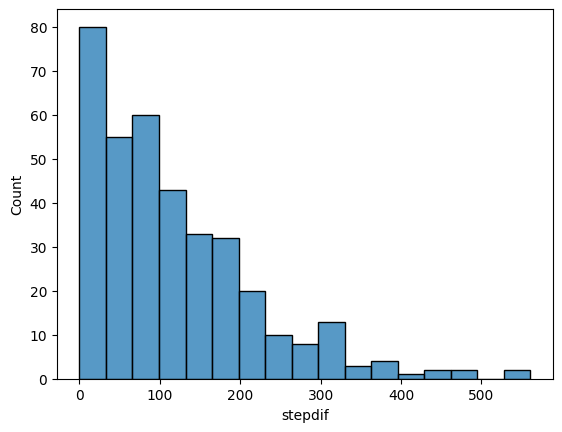

In [46]:
nonfraud_2ndtsf['stepdif'] = abs(nonfraud_2ndtsf['step2'] - nonfraud_2ndtsf['step'])

_ = sns.histplot(x = nonfraud_2ndtsf['stepdif'])

In [47]:
nonfraud_2ndtsf['stepdif'].describe()

count    368.000000
mean     118.130435
std      101.243276
min        0.000000
25%       43.000000
50%       96.000000
75%      168.000000
max      561.000000
Name: stepdif, dtype: float64

In [48]:
nonfraud_2ndtsf['stepdif'].value_counts()

96.0     8
2.0      6
49.0     6
27.0     6
98.0     5
        ..
161.0    1
57.0     1
382.0    1
142.0    1
331.0    1
Name: stepdif, Length: 190, dtype: int64

* Creating a Null non fraud dataframe



In [49]:
nonfraud_null = cashoutnon[cashoutnon.isna().any(axis=1)].fillna(0)

nonfraud_null

,step,type,amount,nameOrig,nameDest,isFraud,step2,type2,amount2
0,8,CASH_OUT,129579.09,C1911360350,C1261940766,0,0.0,0,0.0
1,8,CASH_OUT,141506.84,C47293631,C1021790512,0,0.0,0,0.0
2,8,CASH_OUT,146606.63,C1289055258,C155439298,0,0.0,0,0.0
3,8,CASH_OUT,101056.80,C538054341,C943512909,0,0.0,0,0.0
4,9,CASH_OUT,34763.53,C530291175,C566698125,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
88908,718,CASH_OUT,39975.14,C1666535939,C1327648021,0,0.0,0,0.0
88909,718,CASH_OUT,10331.94,C1819319686,C1367587485,0,0.0,0,0.0
88910,718,CASH_OUT,61777.58,C741640077,C1486427992,0,0.0,0,0.0
88911,718,CASH_OUT,99996.59,C2002811154,C1634831905,0,0.0,0,0.0


In [50]:
nonfraud_null['type2'].replace(0, "NA", inplace = True)

nonfraud_null

,step,type,amount,nameOrig,nameDest,isFraud,step2,type2,amount2
0,8,CASH_OUT,129579.09,C1911360350,C1261940766,0,0.0,NA,0.0
1,8,CASH_OUT,141506.84,C47293631,C1021790512,0,0.0,NA,0.0
2,8,CASH_OUT,146606.63,C1289055258,C155439298,0,0.0,NA,0.0
3,8,CASH_OUT,101056.80,C538054341,C943512909,0,0.0,NA,0.0
4,9,CASH_OUT,34763.53,C530291175,C566698125,0,0.0,NA,0.0
...,...,...,...,...,...,...,...,...,...
88908,718,CASH_OUT,39975.14,C1666535939,C1327648021,0,0.0,NA,0.0
88909,718,CASH_OUT,10331.94,C1819319686,C1367587485,0,0.0,NA,0.0
88910,718,CASH_OUT,61777.58,C741640077,C1486427992,0,0.0,NA,0.0
88911,718,CASH_OUT,99996.59,C2002811154,C1634831905,0,0.0,NA,0.0


In [51]:
nf_null = nonfraud_null.drop(['nameOrig', 'nameDest'], axis = 1)

nf_null

,step,type,amount,isFraud,step2,type2,amount2
0,8,CASH_OUT,129579.09,0,0.0,NA,0.0
1,8,CASH_OUT,141506.84,0,0.0,NA,0.0
2,8,CASH_OUT,146606.63,0,0.0,NA,0.0
3,8,CASH_OUT,101056.80,0,0.0,NA,0.0
4,9,CASH_OUT,34763.53,0,0.0,NA,0.0
...,...,...,...,...,...,...,...
88908,718,CASH_OUT,39975.14,0,0.0,NA,0.0
88909,718,CASH_OUT,10331.94,0,0.0,NA,0.0
88910,718,CASH_OUT,61777.58,0,0.0,NA,0.0
88911,718,CASH_OUT,99996.59,0,0.0,NA,0.0


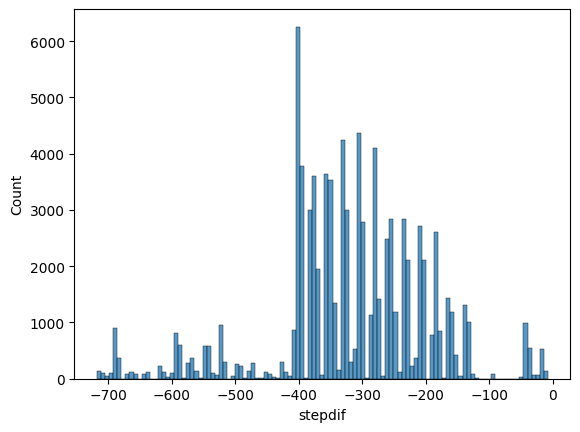

In [52]:
nf_null['stepdif'] = nf_null['step2'] - nf_null['step']

_ = sns.histplot(x = nf_null['stepdif'])

In [53]:
n = len(fraud_final) - len(nonfraud_2ndtsf)

nf_null_2ndtsf = nf_null.sample(n = n)

nf_null_2ndtsf

,step,type,amount,isFraud,step2,type2,amount2,stepdif
75040,401,CASH_OUT,82222.46,0,0.0,NA,0.0,-401.0
73912,400,CASH_OUT,139735.71,0,0.0,NA,0.0,-400.0
71421,397,CASH_OUT,73821.74,0,0.0,NA,0.0,-397.0
62722,373,CASH_OUT,43548.03,0,0.0,NA,0.0,-373.0
22513,237,CASH_OUT,92529.79,0,0.0,NA,0.0,-237.0
...,...,...,...,...,...,...,...,...
9493,183,CASH_OUT,119952.53,0,0.0,NA,0.0,-183.0
22176,236,CASH_OUT,164574.48,0,0.0,NA,0.0,-236.0
67980,380,CASH_OUT,22540.66,0,0.0,NA,0.0,-380.0
85359,590,CASH_OUT,126411.60,0,0.0,NA,0.0,-590.0


* Combining non fraud dataframes of 2nd transactions

In [54]:
combine_non = [nonfraud_2ndtsf, nf_null_2ndtsf]

nonfraud_final = pd.concat(combine_non, ignore_index = True)

nonfraud_final

,step,type,amount,isFraud,step2,type2,amount2,stepdif
0,13,CASH_OUT,128129.29,0,332.0,TRANSFER,128129.29,319.0
1,20,CASH_OUT,95631.42,0,402.0,TRANSFER,95631.42,382.0
2,22,CASH_OUT,146426.45,0,132.0,TRANSFER,146426.45,110.0
3,33,CASH_OUT,50444.36,0,514.0,TRANSFER,50444.36,481.0
4,35,CASH_OUT,26220.97,0,143.0,TRANSFER,26220.97,108.0
...,...,...,...,...,...,...,...,...
1352,183,CASH_OUT,119952.53,0,0.0,NA,0.00,-183.0
1353,236,CASH_OUT,164574.48,0,0.0,NA,0.00,-236.0
1354,380,CASH_OUT,22540.66,0,0.0,NA,0.00,-380.0
1355,590,CASH_OUT,126411.60,0,0.0,NA,0.00,-590.0


* Combining fraud and non fraud dataframes

In [55]:
combine_all = [nonfraud_final, fraud_final]

data_final = pd.concat(combine_all, ignore_index = True)

data_final

,step,type,amount,isFraud,step2,type2,amount2,stepdif
0,13,CASH_OUT,128129.29,0,332.0,TRANSFER,128129.29,319.0
1,20,CASH_OUT,95631.42,0,402.0,TRANSFER,95631.42,382.0
2,22,CASH_OUT,146426.45,0,132.0,TRANSFER,146426.45,110.0
3,33,CASH_OUT,50444.36,0,514.0,TRANSFER,50444.36,481.0
4,35,CASH_OUT,26220.97,0,143.0,TRANSFER,26220.97,108.0
...,...,...,...,...,...,...,...,...
2709,741,TRANSFER,114149.44,1,741.0,CASH_OUT,114149.44,0.0
2710,741,TRANSFER,144945.34,1,741.0,CASH_OUT,144945.34,0.0
2711,741,TRANSFER,48442.88,1,741.0,CASH_OUT,48442.88,0.0
2712,742,TRANSFER,54652.46,1,742.0,CASH_OUT,54652.46,0.0


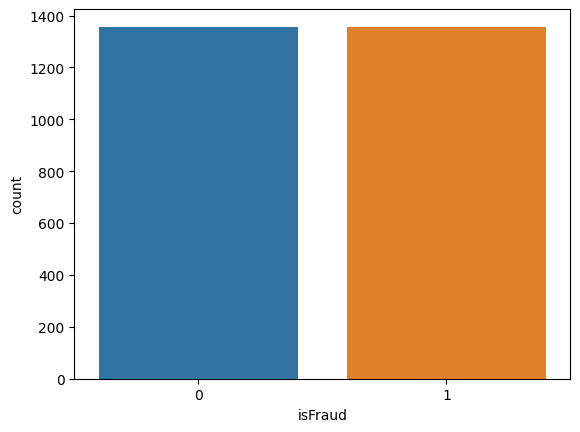

In [56]:
_ = sns.countplot(x = data_final['isFraud'])

* To prepare for ML, drop 'step' and 'step2' columns as 'stepdif' is used to determine duration of transaction

In [57]:
mldata_final = data_final.drop(['step', 'step2'], axis = 1)

mldata_final

,type,amount,isFraud,type2,amount2,stepdif
0,CASH_OUT,128129.29,0,TRANSFER,128129.29,319.0
1,CASH_OUT,95631.42,0,TRANSFER,95631.42,382.0
2,CASH_OUT,146426.45,0,TRANSFER,146426.45,110.0
3,CASH_OUT,50444.36,0,TRANSFER,50444.36,481.0
4,CASH_OUT,26220.97,0,TRANSFER,26220.97,108.0
...,...,...,...,...,...,...
2709,TRANSFER,114149.44,1,CASH_OUT,114149.44,0.0
2710,TRANSFER,144945.34,1,CASH_OUT,144945.34,0.0
2711,TRANSFER,48442.88,1,CASH_OUT,48442.88,0.0
2712,TRANSFER,54652.46,1,CASH_OUT,54652.46,0.0


* 'type2' column should consist of TRANSFER, NA and CASHOUT only
* remove any other value besides the 3 stated

In [58]:
mldata_final['type2'].unique()

array(['TRANSFER', 'NA', 'CASH_OUT', nan], dtype=object)

In [59]:
mldata_final = mldata_final.dropna()

In [60]:
mldata_final['type2'].unique()

array(['TRANSFER', 'NA', 'CASH_OUT'], dtype=object)

In [61]:
mldata_final['type2'].astype('category')

mldata_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2713 entries, 0 to 2713
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   type     2713 non-null   category
 1   amount   2713 non-null   float64 
 2   isFraud  2713 non-null   category
 3   type2    2713 non-null   object  
 4   amount2  2713 non-null   float64 
 5   stepdif  2713 non-null   float64 
dtypes: category(2), float64(3), object(1)
memory usage: 111.6+ KB


## Machine Learning Time!

* The 2 models used are (1) **Logistic Regression** and (2) **Support Vector Machine**. </p>
* Both are supervised machine learning algorithms and used to solve classification problems. </p>

| Logistic Regression | Support Vector Machine
| --- | ---
| different decision boundaries with different weights that are near optimal point | finds the “best” margin and reduces risk of error on the data
| based on statistical approach | based on geometrical properties
| vulnerable to overfitting | lesser risk of overfitting





In [62]:
# Test Size of Train Test Split
i = 0.2

### 1) Logistic Regression

In [63]:
# 1) Divide independent and dependent variable into two separate variables

X = mldata_final.drop(['isFraud'], axis = 1) # input
y = mldata_final['isFraud'] # output (dependent variable)

In [64]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

labelencoder_2 = LabelEncoder()

X['type_cat'] = labelencoder.fit_transform(X['type']) # CASHOUT = 0, TRANSFER = 1

X['type2_cat'] = labelencoder.fit_transform(X['type2']) # CASHOUT = 0, NA = 1, TRANSFER = 2

print(X)

X = X.drop(['type', 'type2'], axis = 1)

print(X)

          type     amount     type2    amount2  stepdif  type_cat  type2_cat
0     CASH_OUT  128129.29  TRANSFER  128129.29    319.0         0          2
1     CASH_OUT   95631.42  TRANSFER   95631.42    382.0         0          2
2     CASH_OUT  146426.45  TRANSFER  146426.45    110.0         0          2
3     CASH_OUT   50444.36  TRANSFER   50444.36    481.0         0          2
4     CASH_OUT   26220.97  TRANSFER   26220.97    108.0         0          2
...        ...        ...       ...        ...      ...       ...        ...
2709  TRANSFER  114149.44  CASH_OUT  114149.44      0.0         1          0
2710  TRANSFER  144945.34  CASH_OUT  144945.34      0.0         1          0
2711  TRANSFER   48442.88  CASH_OUT   48442.88      0.0         1          0
2712  TRANSFER   54652.46  CASH_OUT   54652.46      0.0         1          0
2713  TRANSFER   63416.99  CASH_OUT   63416.99      0.0         1          0

[2713 rows x 7 columns]
         amount    amount2  stepdif  type_cat  type

In [65]:
# 2) Splitting data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, shuffle = True, stratify = y, random_state = SEED)

In [66]:
# Import the Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=5000)

# 3) Train the model
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [67]:
# 4) Test the model
# Keep aside some data to test - X_test and X1_test

y_pred = lr_classifier.predict(X_test)

compare_lr = pd.DataFrame({"Desired Output (Actuals)": y_test,
                           "Predicted Output": y_pred})

compare_lr[:5]

,Desired Output (Actuals),Predicted Output
2649,1,1
883,0,0
540,0,0
2534,1,1
2054,1,1


In [68]:
# 5) Evaluate the models

from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

lr_classreport = classification_report(y_test, y_pred)
lr_confmatrix = confusion_matrix(y_test, y_pred)

# LR Classification Report
print("LR Classification Report:")
print()
print(lr_classreport)
print()

# LR Confusion Matrix
print("LR Confusion Matrix:")
print(lr_confmatrix)

LR Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       272
           1       0.99      1.00      1.00       271

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543


LR Confusion Matrix:
[[270   2]
 [  0 271]]


In [69]:
# LR Accuracy Score
lr_test_acc = lr_classifier.score(X_test, y_test)
print("LR Accuracy  = {:.2f}".format(lr_test_acc))

# LR Precision
lr_test_pre = precision_score(y_test, y_pred, average=None)
print("LR Precision = {}".format(lr_test_pre))

# LR Recall
lr_test_rec  = recall_score(y_test, y_pred, average=None)
print("LR Recall    = {}".format(lr_test_rec))

LR Accuracy  = 1.00
LR Precision = [1.         0.99267399]
LR Recall    = [0.99264706 1.        ]


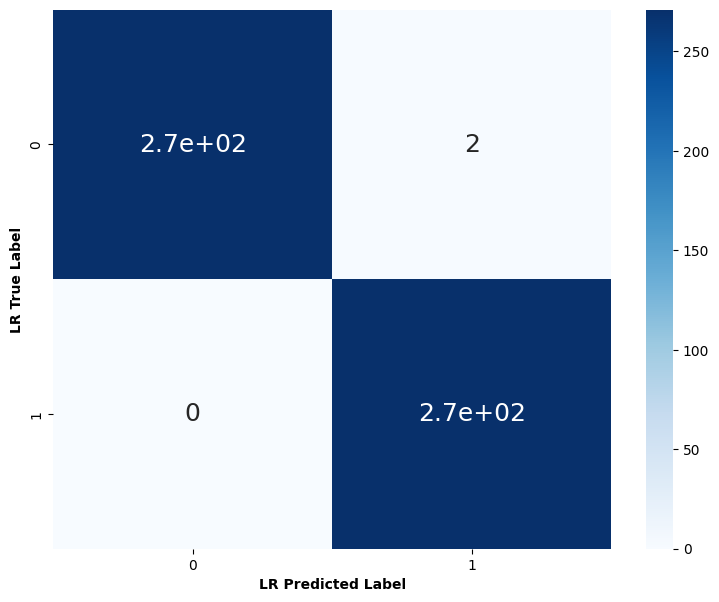

In [70]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))

_ = sns.heatmap(lr_confmatrix, annot=True, annot_kws={"size": 18}, cmap=plt.cm.Blues)

_ = plt.ylabel('LR True Label', fontweight='bold')
_ = plt.xlabel('LR Predicted Label', fontweight='bold')

In [71]:
# List out the first twenty or less missed predictions
lr_compared_bool = compare_lr['Desired Output (Actuals)'] != compare_lr['Predicted Output']
lr_missed_df = compare_lr[lr_compared_bool]
lr_missed_df[:10]

,Desired Output (Actuals),Predicted Output
166,0,1
252,0,1


In [72]:
# Choose a random row from X_test
lr_my_features = X_test.iloc[np.random.randint(0, len(X_test))]
lr_own_pred = lr_classifier.predict(lr_my_features.to_numpy().reshape(1,-1))
print("My prediction is a {}.".format(lr_own_pred[0]))
print("This was the input data:")
print(lr_my_features)

My prediction is a 0.
This was the input data:
amount       104042.41
amount2      104042.41
stepdif         118.00
type_cat          0.00
type2_cat         2.00
Name: 200, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### 2) Support Vector Machine

In [73]:
# 1) Divide independent and dependent variable into two separate variables

X1 = mldata_final.drop(['isFraud'], axis = 1) # input
y1 = mldata_final['isFraud'] # output (dependent variable)

In [74]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

labelencoder_2 = LabelEncoder()

X1['type_cat'] = labelencoder.fit_transform(X1['type']) # CASHOUT = 0, TRANSFER = 1

X1['type2_cat'] = labelencoder.fit_transform(X1['type2']) # CASHOUT = 0, NA = 1, TRANSFER = 2

print(X1)

X1 = X1.drop(['type', 'type2'], axis = 1)

print(X1)

          type     amount     type2    amount2  stepdif  type_cat  type2_cat
0     CASH_OUT  128129.29  TRANSFER  128129.29    319.0         0          2
1     CASH_OUT   95631.42  TRANSFER   95631.42    382.0         0          2
2     CASH_OUT  146426.45  TRANSFER  146426.45    110.0         0          2
3     CASH_OUT   50444.36  TRANSFER   50444.36    481.0         0          2
4     CASH_OUT   26220.97  TRANSFER   26220.97    108.0         0          2
...        ...        ...       ...        ...      ...       ...        ...
2709  TRANSFER  114149.44  CASH_OUT  114149.44      0.0         1          0
2710  TRANSFER  144945.34  CASH_OUT  144945.34      0.0         1          0
2711  TRANSFER   48442.88  CASH_OUT   48442.88      0.0         1          0
2712  TRANSFER   54652.46  CASH_OUT   54652.46      0.0         1          0
2713  TRANSFER   63416.99  CASH_OUT   63416.99      0.0         1          0

[2713 rows x 7 columns]
         amount    amount2  stepdif  type_cat  type

In [75]:
# 2) Splitting data into training and testing sets

from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = i, shuffle = True, stratify = y1, random_state = SEED)

In [76]:
# Import the Support Vector Machines algorithm
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(max_iter = 5000)

# 3) Train the model
svm_classifier.fit(X1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=5000)

In [77]:
# 4) Test the model
# Keep aside some data to test - X_test

y1_pred = svm_classifier.predict(X1_test)

compare_svm = pd.DataFrame({"Desired Output (Actuals)": y1_test,
                           "Predicted Output": y1_pred})

compare_svm[:5]

,Desired Output (Actuals),Predicted Output
2649,1,1
883,0,0
540,0,0
2534,1,1
2054,1,0


In [78]:
# 5) Evaluate the model

from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

svm_classreport = classification_report(y1_test, y1_pred)
svm_confmatrix = confusion_matrix(y1_test, y1_pred)

# SVM Classification Report
print("SVM Classification report:")
print()
print(svm_classreport)
print()

# SVM Confusion Matrix
print("SVM Confusion Matrix:")
print(svm_confmatrix)

SVM Classification report:

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       272
           1       0.89      0.44      0.59       271

    accuracy                           0.69       543
   macro avg       0.76      0.69      0.67       543
weighted avg       0.76      0.69      0.67       543


SVM Confusion Matrix:
[[258  14]
 [152 119]]


In [79]:
# Accuracy Score
svm_test_acc = svm_classifier.score(X1_test, y1_test)
print("SVM Accuracy  = {:.2f}".format(svm_test_acc))

# Precision
svm_test_pre = precision_score(y1_test, y1_pred, average=None)
print("SVM Precision = {}".format(svm_test_pre))

# Recall
svm_test_rec  = recall_score(y1_test, y1_pred, average=None)
print("SVM Recall    = {}".format(svm_test_rec))

SVM Accuracy  = 0.69
SVM Precision = [0.62926829 0.89473684]
SVM Recall    = [0.94852941 0.43911439]


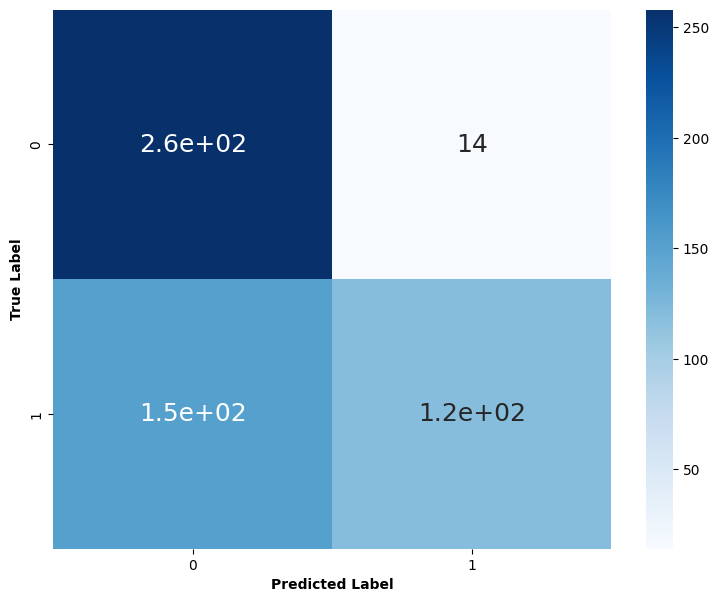

In [80]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))

_ = sns.heatmap(svm_confmatrix, annot=True, annot_kws={"size": 18}, cmap=plt.cm.Blues)

_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

In [81]:
# List out the first twenty or less missed predictions
svm_compared_bool = compare_svm['Desired Output (Actuals)'] != compare_svm['Predicted Output']
svm_missed_df = compare_svm[svm_compared_bool]
svm_missed_df[:10]

,Desired Output (Actuals),Predicted Output
2054,1,0
2699,1,0
1881,1,0
1607,1,0
343,0,1
2421,1,0
1706,1,0
1663,1,0
2540,1,0
1992,1,0


In [82]:
# Choose a random row from X1_test
svm_my_features = X1_test.iloc[np.random.randint(0, len(X1_test))]
svm_own_pred = svm_classifier.predict(svm_my_features.to_numpy().reshape(1,-1))
print("My prediction is a {}.".format(svm_own_pred[0]))
print("This was the input data:")
print(svm_my_features)

My prediction is a 0.
This was the input data:
amount       153870.09
amount2      153870.09
stepdif           0.00
type_cat          1.00
type2_cat         0.00
Name: 2480, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


## Comparison & Summary

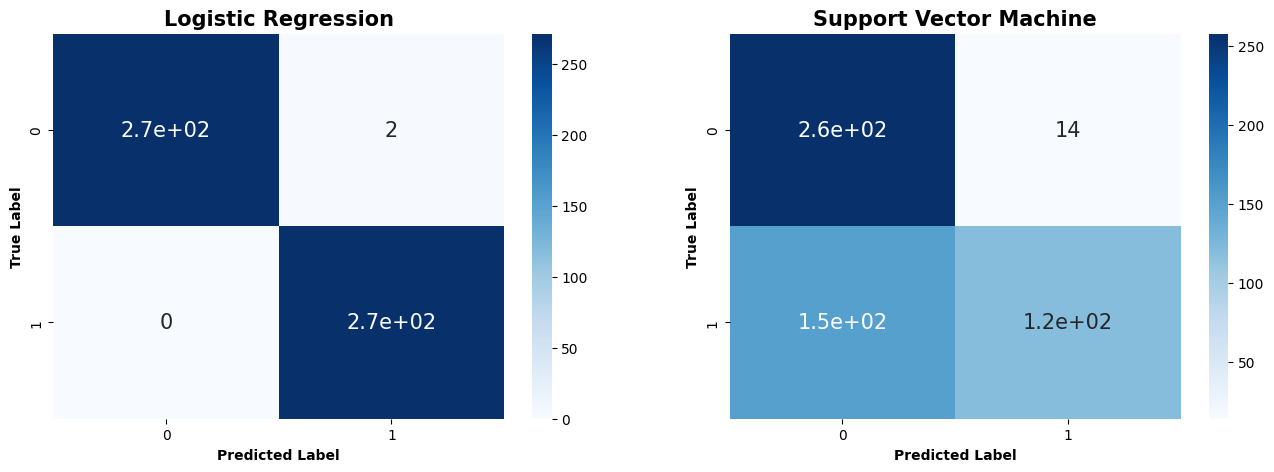

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

_ = sns.heatmap(ax=axes[0], data = lr_confmatrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues)
_ = axes[0].set_title('Logistic Regression', fontdict={'size': 15, 'weight': 'bold'})
_ = axes[0].set_xlabel('Predicted Label', fontdict={'weight': 'bold'})
_ = axes[0].set_ylabel('True Label', fontdict={'weight': 'bold'})

_ = sns.heatmap(ax=axes[1], data = svm_confmatrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues)
_ = axes[1].set_title('Support Vector Machine', fontdict={'size': 15, 'weight': 'bold'})
_ = axes[1].set_xlabel('Predicted Label', fontdict={'weight':'bold'})
_ = axes[1].set_ylabel('True Label', fontdict={'weight':'bold'})

In [84]:
ml_compare = Texttable()

ml_compare.set_cols_align(["c", "c", "c"])
ml_compare.set_cols_valign(["m", "m", "m"])

ml_compare.add_rows([
    ['Split = 0.2', 'Logistic Regression', 'Support Vector Machine'],
    ['Accuracy', lr_test_acc, svm_test_acc],
    ['Precision [0 1]', lr_test_pre, svm_test_pre],
    ['Recall [0 1]', lr_test_rec, svm_test_rec],
    ['Confusion Matrix', lr_confmatrix, svm_confmatrix]    ])

print(ml_compare.draw())

+------------------+-------------------------+-------------------------+
|   Split = 0.2    |   Logistic Regression   | Support Vector Machine  |
+==================+=========================+=========================+
|     Accuracy     |          0.996          |          0.694          |
+------------------+-------------------------+-------------------------+
| Precision [0 1]  | [1.         0.99267399] | [0.62926829 0.89473684] |
+------------------+-------------------------+-------------------------+
|   Recall [0 1]   | [0.99264706 1.        ] | [0.94852941 0.43911439] |
+------------------+-------------------------+-------------------------+
| Confusion Matrix |       [[270   2]        |       [[258  14]        |
|                  |        [  0 271]]       |        [152 119]]       |
+------------------+-------------------------+-------------------------+


In [85]:
Image(url="https://i.gyazo.com/5ef46edaa6b2ba69546b377f8727fb98.png", width = 550)

In [86]:
lr_my_features = X_test.iloc[np.random.randint(0, len(X_test))]
lr_own_pred = lr_classifier.predict(lr_my_features.to_numpy().reshape(1,-1))

svm_my_features = X1_test.iloc[np.random.randint(0, len(X1_test))]
svm_own_pred = svm_classifier.predict(svm_my_features.to_numpy().reshape(1,-1))

ml_prediction = Texttable()

ml_prediction.set_cols_align(["c", "c", "c"])
ml_prediction.set_cols_valign(["m", "m", "m"])

ml_prediction.add_rows([
    [' ', 'Logistic Regression', 'Support Vector Machine'],
    ['Prediction', lr_own_pred[0], svm_own_pred[0]],
    ['Input Data', lr_my_features, svm_my_features]    ])

print(ml_prediction.draw())


encoderlabel = Texttable()

encoderlabel.set_cols_align(["c", "c", "c"])
encoderlabel.set_cols_valign(["m", "m", "m"])

encoderlabel.add_rows([
    [' ', 'type_cat', 'type_cat2'],
    ['CASHOUT', '0', '0'],
    ['NA', '-', '1'],
    ['TRANSFER', '1', '2'] ])

print(encoderlabel.draw())


+------------+----------------------------+--------------------------+
|            |    Logistic Regression     |  Support Vector Machine  |
+============+============================+==========================+
| Prediction |             1              |            1             |
+------------+----------------------------+--------------------------+
|            |   amount       102229.91   |  amount       11261.51   |
|            |   amount2      102229.91   |  amount2      11261.51   |
| Input Data |   stepdif           0.00   |  stepdif          3.00   |
|            |   type_cat          1.00   |  type_cat         0.00   |
|            |   type2_cat         0.00   |  type2_cat        2.00   |
|            | Name: 1706, dtype: float64 | Name: 40, dtype: float64 |
+------------+----------------------------+--------------------------+
+----------+----------+-----------+
|          | type_cat | type_cat2 |
+==========+==========+===========+
| CASHOUT  |    0     |     0     |
+---

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


## Observations

* There are no transactions to merchants for fraud while non fraud has transactions for both merchants and customers.
* For fraud and non fraud transactions, the origin accounts are unique and have no duplicates found in destination accounts.
* Transactions for transfer and cash out are done within the hour for fraud.
* Same amounts transacted for transfer and cash out could be fraud or non fraud. However, the duration of transactions determine its fraudulent nature.
  * For example, for non fraud, difference between transactions are negative whereas fraud is almost always a positive difference.
* Overall, fraud behaviour is determined by the same amount transacted for transfer and cashout and the transactions have to happen within the hour.

* For ML models, accuracies of both models are reduced at 80% training data as compared to at 50% training data

## Insights
* Easier to predict as the data is well balanced, clean and clear cut
* Model could also be biased so will need more data as input to better train the model
* Having a split of more training data does not always result in better accuracies due to overfitting. Similarly, too little of training data may result in underfitting.
  * Number of iterations also play apart in the accuracy of model.
* Does not accurately reflect actual fraudsters as it is evident that based on the dataset transactions of same amounts happen within the same hour. Hence, if this happens in real life, it is easily detected as fraud.

## Other Comments

##### As the dataset filtered and used as input is balanced, could consider increasing the size of the clean and filtered dataset to improve both models.

##### As the behaviour of the data is consistent, could consider tweaking the dataset by oversampling and undersampling with insufficient data as the input data.